In [ ]:
# import pandas as pd
# import seaborn as sns
# import os, random
# import cv2
# from glob import glob #to get files as defined in the given pathname argument
# import sklearn
# from sklearn.model_selection import train_test_split #to get traning data and test data
# import tensorflow as tf #ti implement ML DL applications
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import RMSprop #Root Mean Square propogation is an optimization algo used in DL
# from tensorflow.keras import backend as K #to deploy network computation on multiple CPU, GPU, servers without changing the currrent code
# from sklearn.metrics import accuracy_score, classification_report
# from pathlib import Path
# from PIL import Image

In [56]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

In [58]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values of the images
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the images to include a channel dimension (for the convolutional layers)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/15
938/938 [==============================] - 30s 31ms/step - loss: 0.1763 - accuracy: 0.9455 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 2/15
938/938 [==============================] - 30s 32ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0685 - val_accuracy: 0.9807
Epoch 3/15
938/938 [==============================] - 29s 31ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0362 - val_accuracy: 0.9876
Epoch 4/15
938/938 [==============================] - 29s 31ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 5/15
938/938 [==============================] - 29s 31ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 6/15
938/938 [==============================] - 29s 31ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0338 - val_accuracy: 0.9912
Epoch 7/15
938/938 [==============================] - 29s 31ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0288 - val_accuracy:

In [59]:
# Save the model to the 'model' directory
model.save('/content/model')

# Download the model files as a zip file
import shutil
shutil.make_archive('/content/model', 'zip', '/content/model')

# Alternatively, you can use the following code to download individual files
# from google.colab import files
# files.download('/content/model.zip')


'/content/model.zip'

313/313 [==============================] - 2s 7ms/step - loss: 0.0515 - accuracy: 0.9926
Test accuracy: 0.9926000237464905


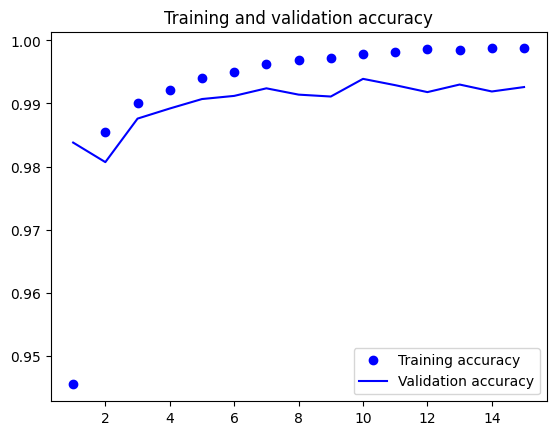

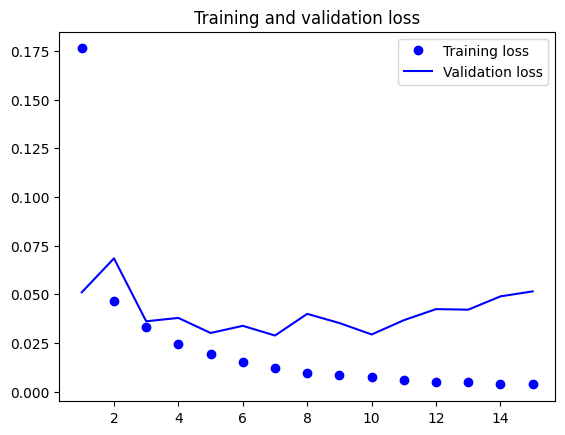

In [60]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

# Plot the accuracy and loss curves for the training and validation sets
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

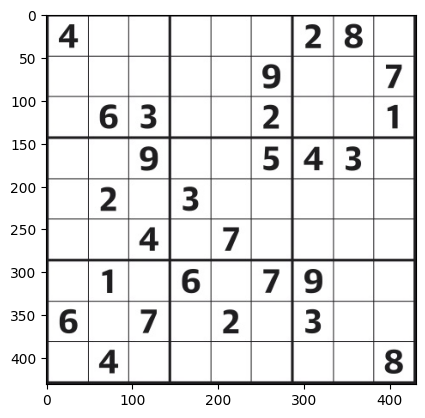

In [62]:
import cv2
sudoku_a = cv2.imread('/content/drive/MyDrive/Sem-4/PSC/IA/sudoku.jpg') #provide path for the input sudoku puzzle image
plt.figure()
plt.imshow(sudoku_a)
plt.show()

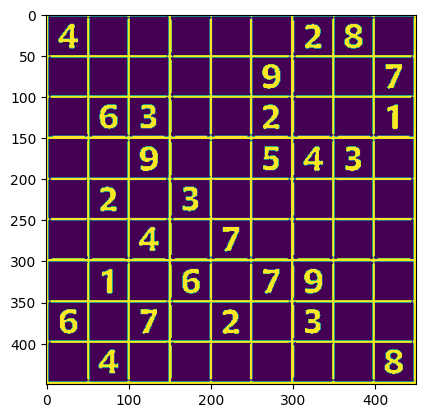

In [63]:
#resizing the image in a square and preprocessing it
sudoku_a = cv2.resize(sudoku_a, (450,450))

def preprocess(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converting the color to gray scale
  blur = cv2.GaussianBlur(gray, (3,3), 6) #low pass filter which removes high-frequency components(i.e. noise)
  threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) #will convert the image to gray adaptively with varying lighting conditions
  return threshold_img

threshold = preprocess(sudoku_a)
plt.figure()
plt.imshow(threshold)
plt.show()

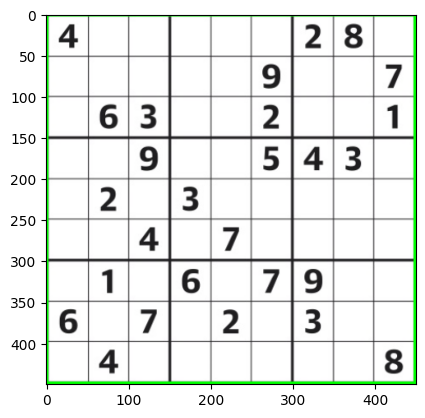

In [64]:
#finding the biggest contour(outline) of puzzle
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #to find the biggest contour
cv2.drawContours(contour_1, contour, -1, (0,255,0), 3) #drawing the biggest contour
plt.figure()
plt.imshow(contour_1)
plt.show()

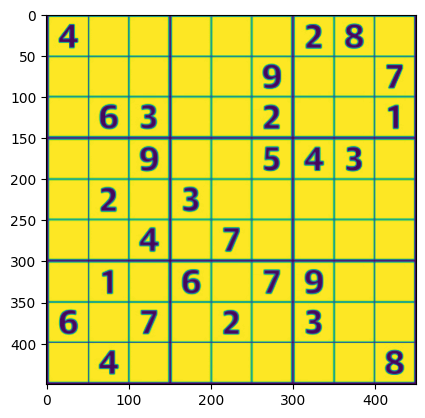

In [65]:
#alligning the puzzle if it's not
def main_outline(contour):
  biggest = np.array([])
  max_area = 0
  for i in contour:
    area = cv2.contourArea(i) #calculating area of contours
    if area > 50:
      peri = cv2.arcLength(i, True) #calculating perimeter
      approx = cv2.approxPolyDP(i, 0.02*peri, True) #to approximate the shape of contour
      if area > max_area and len(approx) == 4:
        biggest = approx
        max_area = area
  return biggest, max_area #ww will get the four points of the biggest contour

def reframe(points): #will arrange the points obtained in the biggest for the warp
  points = points.reshape((4, 2))
  points_new = np.zeros((4, 1, 2), dtype = np.int32)
  add = points.sum(1)
  points_new[0] = points[np.argmin(add)]
  points_new[3] = points[np.argmax(add)]
  diff = np.diff(points, axis = 1)
  points_new[1] = points[np.argmin(diff)]
  points_new[2] = points[np.argmax(diff)]
  return points_new

black_img = np.zeros((450, 450, 3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
  biggest = reframe(biggest)
  cv2.drawContours(contour_2, biggest, -1, (0, 255, 0), 10)
  pts1 = np.float32(biggest) #gives the points of the image
  pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]]) #how should be the image alligned
  matrix = cv2.getPerspectiveTransform(pts1, pts2) #alligning the image properly i.e. it will transform images from / \ to | |
  imagewrap = cv2.warpPerspective(sudoku_a, matrix, (450, 450)) #to fit the sudoku_a image with the matrix calculated as above
  imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(imagewrap)
plt.show()

81


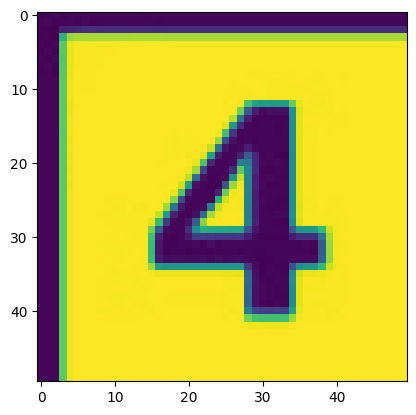

In [66]:
#from google.colab.patches import cv2_imshow
def splitcells(img):
  rows = np.vsplit(img, 9)
  boxes = []
  for r in rows:
    cols = np.hsplit(r, 9)
    for box in cols:
      boxes.append(box)
  print(len(boxes))
  return boxes

sudoku_cell = splitcells(imagewrap)
plt.figure()
plt.imshow(sudoku_cell[0]) #will give columns
plt.show()

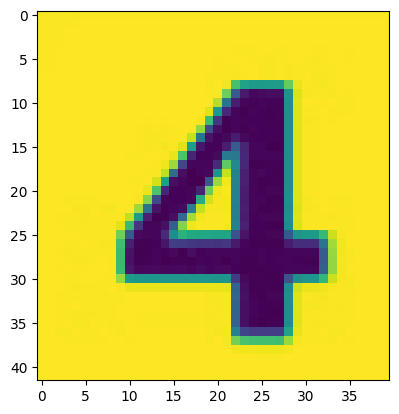

In [68]:
from PIL import Image
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
    return Cells_croped
sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[0])
plt.show()

In [69]:
from PIL import Image as im
# data = im.fromarray((sudoku_cell_croped[0]))
ls=[]
for i in range(0,81):
    data = sudoku_cell_croped[i]
    img = np.array(data)
    img = data.resize((28, 28))
    print(img.size)
    print(type(img))
    img = im.eval(img, lambda x: 255 - x)
    c = np.array(img)
    pred = model.predict(c.reshape(1, 28, 28, 1))
    flag=0
    for k in pred[0]:
        if k==1: flag=1
    if flag!=1: ls.append(0)
    else: ls.append(pred.argmax())
print(ls)

(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 60ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 17ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 19ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 16ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 16ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 15ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 15ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 15ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 15ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 14ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 14ms/step
(28, 28)
<class 'PIL.Image.Image'>
1/1 [===

In [70]:
# Final predicted numbers array
ls=np.array(ls)
arr=np.reshape(ls,(3,3,9))
arr = arr.reshape(9,9)
print(arr)
print(arr.shape)

[[4 0 0 0 0 0 2 8 0]
 [0 0 0 0 0 9 0 0 7]
 [0 6 3 0 0 2 0 0 1]
 [0 0 9 0 0 5 4 3 0]
 [0 2 0 3 0 0 0 0 0]
 [0 0 4 0 7 0 0 0 0]
 [0 1 0 6 0 7 9 0 0]
 [6 0 7 0 2 0 3 0 0]
 [0 4 0 0 0 0 0 0 8]]
(9, 9)


In [71]:
grid=list(np.reshape(arr,(9,9)))
solutions = []

def possible(row, column, number):
    global grid
    #Is the number appearing in the given row?
    for i in range(0,9):
        if grid[row][i] == number:
            return False

    #Is the number appearing in the given column?
    for i in range(0,9):
        if grid[i][column] == number:
            return False

    #Is the number appearing in the given square?
    x0 = (column // 3) * 3
    y0 = (row // 3) * 3
    for i in range(0,3):
        for j in range(0,3):
            if grid[y0+i][x0+j] == number:
                return False

    return True

def solve():
    global grid
    for row in range(0,9):
        for column in range(0,9):
            if grid[row][column] == 0:
                for number in range(1,10):
                    if possible(row, column, number):
                        grid[row][column] = number
                        solve()
                        grid[row][column] = 0
                return
    print(np.matrix(grid))
    solutions.append(np.array(grid))

solutions = []
solve()
op = np.array(solutions)
op = op.reshape(9, 9)
print(op.shape)

[[4 9 5 7 6 1 2 8 3]
 [2 8 1 5 3 9 6 4 7]
 [7 6 3 4 8 2 5 9 1]
 [8 7 9 2 1 5 4 3 6]
 [1 2 6 3 9 4 8 7 5]
 [5 3 4 8 7 6 1 2 9]
 [3 1 8 6 4 7 9 5 2]
 [6 5 7 9 2 8 3 1 4]
 [9 4 2 1 5 3 7 6 8]]
(9, 9)


In [72]:
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend for saving figures

In [73]:
#generate a desired output image
import numpy as np
import matplotlib.pyplot as plt

def display_sudoku(grid, save_path=None):
    import matplotlib
    matplotlib.use('Agg')  # Use the 'Agg' backend for saving figures

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.tick_params(axis='both', which='both', length=0)  # Turn off ticks

    ax.grid(which='both', color='gray', linestyle='-', linewidth=2)

    # Draw thicker border lines around subgrids
    for i in range(4):
        linewidth = 2 if i % 3 == 0 else 0.5
        ax.axhline(i * 3, color='black', linewidth=linewidth)
        ax.axvline(i * 3, color='black', linewidth=linewidth)

    for i in range(9):
        for j in range(9):
            if grid[i][j] != 0:
                ax.text(j + 0.5, 8.5 - i, str(grid[i][j]), ha='center', va='center', fontsize=14)

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)  # Remove padding
    else:
        plt.show()


In [74]:
path = '/content/drive/MyDrive/Sem-4/PSC/IA/output.jpg' #path for saving the solved sudoku puzzle image
display_sudoku(op, save_path=path)